In [143]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [144]:
df = pd.read_csv('stock2.csv')
print(df.head())
df=df.head(103)

         Date    Stock  liabilities      equity  total_assets  current_assets  \
0  31-07-2006  Stock 2   155.686970  166.198400    321.885370      146.818770   
1  31-08-2006  Stock 2   449.520225  724.628052   1174.148277      697.844089   
2  29-09-2006  Stock 2   772.329807  122.548556    894.878363      676.568843   
3  31-10-2006  Stock 2   207.897952  556.403343    764.301295      375.432925   
4  30-11-2006  Stock 2   345.829482  621.027322    966.856804      701.990627   

   current_liabilities  total_revenue  net_income   dividend  \
0           179.842218     587.794582  265.704857  78.726380   
1           800.364274     914.591085  140.184353  37.618949   
2           640.715835     104.108352  -44.772388   0.000000   
3           322.453121     875.817214  -44.114147   0.000000   
4           834.341760     468.912606  -78.662171   0.000000   

   shares_outstanding       price  
0             1088613  100.000000  
1             1043062  102.342690  
2             100920

In [145]:
cols = list(df)[2:12]
print(cols)

['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding', 'price']


In [146]:
df_for_training = df[cols].astype(float)

In [147]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [148]:
trainX = []
trainY = []

In [150]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20 # Number of past days we want to use to predict the future.

In [151]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (83, 20, 10).
trainY shape == (83, 1).


In [152]:
df_for_training_scaled

array([[-1.54183930e+00, -1.51690763e+00, -2.11700379e+00, ...,
         1.91713031e+00,  1.43382767e+00, -2.34832364e+00],
       [-2.52697788e-01,  6.60465461e-01,  3.19612781e-01, ...,
         5.40622681e-01, -9.20415570e-02, -1.52918532e+00],
       [ 1.16357225e+00, -1.68710274e+00, -4.78818894e-01, ...,
        -7.19071006e-01, -1.22628520e+00, -1.08462276e+00],
       ...,
       [ 1.80041157e-03, -1.42190263e+00, -1.04143004e+00, ...,
        -7.19071006e-01,  1.39754930e+00, -3.80115540e-01],
       [ 7.61273489e-01,  1.16816213e+00,  1.35263264e+00, ...,
        -7.19071006e-01, -9.39273991e-01, -5.15627432e-01],
       [-1.08195545e+00,  1.12362242e+00,  1.18835191e-01, ...,
        -6.82837789e-01,  6.35368387e-01, -7.92709025e-01]])

In [153]:
trainY

array([[ 0.84587615],
       [ 0.74464867],
       [ 0.33059057],
       [ 0.42076173],
       [ 0.89054128],
       [ 1.46679161],
       [ 1.33539434],
       [ 0.94391312],
       [ 1.19496928],
       [ 1.49391923],
       [ 1.16054061],
       [ 1.37209418],
       [ 1.03412858],
       [ 1.23378629],
       [ 0.89213586],
       [ 0.94789684],
       [ 1.11457608],
       [ 1.44075271],
       [ 1.08450854],
       [ 0.50046953],
       [ 0.1934889 ],
       [ 0.36355904],
       [ 0.4547171 ],
       [ 0.08657668],
       [-0.23239778],
       [-0.49740078],
       [-1.03046398],
       [-1.47683906],
       [-2.00255593],
       [-1.62313333],
       [-1.83113296],
       [-1.61896294],
       [-1.78937208],
       [-1.52316454],
       [-1.11599777],
       [-1.26109534],
       [-1.13467789],
       [-0.81416493],
       [-0.07559576],
       [ 0.38269008],
       [ 0.21184936],
       [ 0.07477653],
       [ 0.15784828],
       [-0.15160356],
       [-0.64085262],
       [-0

In [154]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20, 64)            19200     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [155]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
25/25 [==============================] - 5s 36ms/step - loss: 0.7501 - val_loss: 0.5007
Epoch 2/5
25/25 [==============================] - 1s 22ms/step - loss: 0.4073 - val_loss: 0.2093
Epoch 3/5
25/25 [==============================] - 1s 20ms/step - loss: 0.2271 - val_loss: 0.1774
Epoch 4/5
25/25 [==============================] - 1s 21ms/step - loss: 0.1267 - val_loss: 0.1482
Epoch 5/5
25/25 [==============================] - 1s 21ms/step - loss: 0.0871 - val_loss: 0.1870


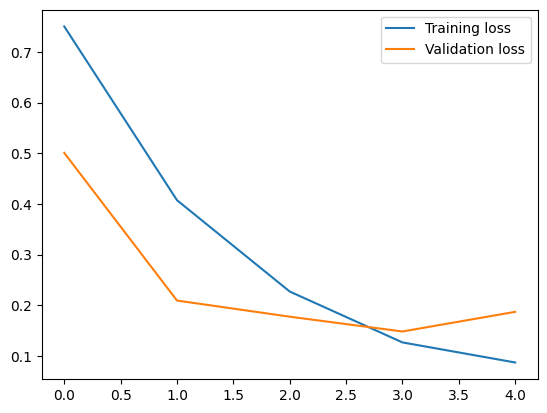

In [156]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [157]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [158]:
df2= df.head(150)
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) 

88    2013-11-29
89    2013-12-31
90    2014-01-31
91    2014-02-28
92    2014-03-31
93    2014-04-30
94    2014-05-30
95    2014-06-30
96    2014-07-31
97    2014-08-29
98    2014-09-30
99    2014-10-31
100   2014-11-28
101   2014-12-31
102   2015-01-31
Name: Date, dtype: datetime64[ns]


<ipython-input-158-8e23a519e50a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_dates = pd.to_datetime(df2['Date'])


In [159]:
n_past = 1
n_days_for_prediction=48  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2015-01-31 00:00:00', freq='M'), Timestamp('2015-02-28 00:00:00', freq='M'), Timestamp('2015-03-31 00:00:00', freq='M'), Timestamp('2015-04-30 00:00:00', freq='M'), Timestamp('2015-05-31 00:00:00', freq='M'), Timestamp('2015-06-30 00:00:00', freq='M'), Timestamp('2015-07-31 00:00:00', freq='M'), Timestamp('2015-08-31 00:00:00', freq='M'), Timestamp('2015-09-30 00:00:00', freq='M'), Timestamp('2015-10-31 00:00:00', freq='M'), Timestamp('2015-11-30 00:00:00', freq='M'), Timestamp('2015-12-31 00:00:00', freq='M'), Timestamp('2016-01-31 00:00:00', freq='M'), Timestamp('2016-02-29 00:00:00', freq='M'), Timestamp('2016-03-31 00:00:00', freq='M'), Timestamp('2016-04-30 00:00:00', freq='M'), Timestamp('2016-05-31 00:00:00', freq='M'), Timestamp('2016-06-30 00:00:00', freq='M'), Timestamp('2016-07-31 00:00:00', freq='M'), Timestamp('2016-08-31 00:00:00', freq='M'), Timestamp('2016-09-30 00:00:00', freq='M'), Timestamp('2016-10-31 00:00:00', freq='M'), Timestamp('2016-11-30 00:00:00'

In [160]:
prediction = model.predict(trainX[-n_days_for_prediction:]) 

2/2 [==============================] - 0s 10ms/step


In [161]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,9]

In [162]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [163]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original


<ipython-input-163-20f60c629b61>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  original['Date']=pd.to_datetime(original['Date'])
<ipython-input-163-20f60c629b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,price
0,2006-07-31,100.000000
1,2006-08-31,102.342690
2,2006-09-29,103.614114
3,2006-10-31,102.783715
4,2006-11-30,102.431306
...,...,...
98,2014-09-30,108.005850
99,2014-10-31,105.918877
100,2014-11-28,105.628966
101,2014-12-31,105.241410


In [164]:
df_forecast

,Date,price
0,2015-01-31,104.574539
1,2015-02-28,104.691109
2,2015-03-31,105.103241
3,2015-04-30,106.461250
4,2015-05-31,107.293427
5,2015-06-30,107.028801
6,2015-07-31,107.129005
7,2015-08-31,107.449715
8,2015-09-30,107.008568
9,2015-10-31,106.467140


<Axes: xlabel='Date'>

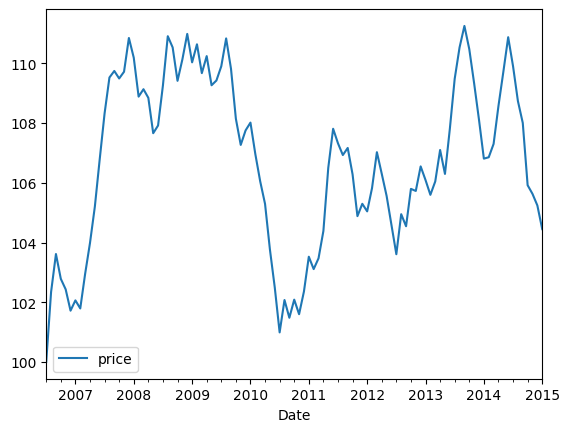

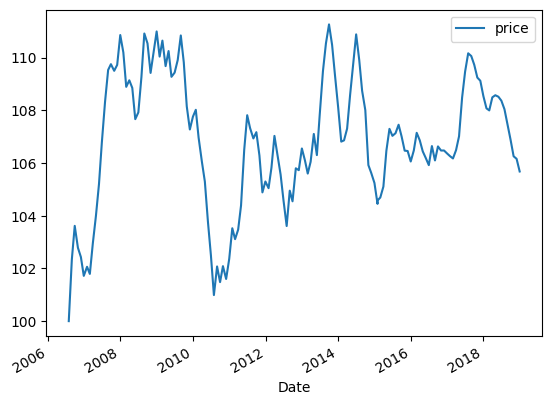

In [165]:
original.plot(x='Date',y='price')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')
#f_forecast.plot(x='Date',y='price')

In [166]:
predicted = df_forecast
print(predicted)

         Date       price
0  2015-01-31  104.574539
1  2015-02-28  104.691109
2  2015-03-31  105.103241
3  2015-04-30  106.461250
4  2015-05-31  107.293427
5  2015-06-30  107.028801
6  2015-07-31  107.129005
7  2015-08-31  107.449715
8  2015-09-30  107.008568
9  2015-10-31  106.467140
10 2015-11-30  106.453384
11 2015-12-31  106.055450
12 2016-01-31  106.473129
13 2016-02-29  107.143211
14 2016-03-31  106.858284
15 2016-04-30  106.439346
16 2016-05-31  106.181633
17 2016-06-30  105.917908
18 2016-07-31  106.641212
19 2016-08-31  106.095352
20 2016-09-30  106.627487
21 2016-10-31  106.471336
22 2016-11-30  106.472984
23 2016-12-31  106.359222
24 2017-01-31  106.251892
25 2017-02-28  106.171089
26 2017-03-31  106.487396
27 2017-04-30  107.010895
28 2017-05-31  108.485352
29 2017-06-30  109.463531
30 2017-07-31  110.159622
31 2017-08-31  110.055443
32 2017-09-30  109.723824
33 2017-10-31  109.238640
34 2017-11-30  109.118439
35 2017-12-31  108.532677
36 2018-01-31  108.071465
37 2018-02-2

In [167]:
predicted_values = predicted.loc[:,"price"]

In [168]:
predicted_values = predicted_values.tolist()
print(predicted_values)

[104.57453918457031, 104.69110870361328, 105.10324096679688, 106.46125030517578, 107.29342651367188, 107.02880096435547, 107.1290054321289, 107.44971466064453, 107.0085678100586, 106.4671401977539, 106.45338439941406, 106.05545043945312, 106.47312927246094, 107.1432113647461, 106.85828399658203, 106.43934631347656, 106.18163299560547, 105.91790771484375, 106.6412124633789, 106.09535217285156, 106.62748718261719, 106.4713363647461, 106.47298431396484, 106.35922241210938, 106.25189208984375, 106.17108917236328, 106.48739624023438, 107.01089477539062, 108.4853515625, 109.46353149414062, 110.15962219238281, 110.0554428100586, 109.72382354736328, 109.23863983154297, 109.11843872070312, 108.53267669677734, 108.07146453857422, 107.99345397949219, 108.49002075195312, 108.56897735595703, 108.51168823242188, 108.36051177978516, 108.03784942626953, 107.44622802734375, 106.88742065429688, 106.25354766845703, 106.15690612792969, 105.67659759521484]


In [169]:
a = pd.read_csv('actual.csv')

In [170]:
actual = a.loc[:,"price"]
actual_values = actual.tolist()
print(actual_values)

[104.4489716, 104.8083736, 103.7017576, 103.7384954, 104.5878343, 103.9895611, 102.9842301, 102.5713629, 102.7292958, 103.5876631, 103.6530683, 102.2383587, 103.0533454, 102.3735477, 102.7276857, 102.8276686, 101.3536416, 100.4444243, 99.48847163, 99.92756997, 100.8160342, 100.7117333, 99.84441634, 98.56781955, 97.35471252, 96.76212589, 97.05152953, 96.62346236, 96.24297215, 95.56583405, 95.85892246, 96.81383299, 98.22790941, 97.72161558, 96.70744408, 95.77597105, 94.932173, 93.68556542, 91.96303814, 90.9202453, 89.60975777, 90.07693285, 89.32459451, 88.80211303, 88.01892953, 87.61781155, 88.13526119, 88.94282622]


In [171]:
l=len(actual_values)
efficiency=[]
for i in range(0,l):
  e=100-((abs(actual_values[i]-predicted_values[i]))/actual_values[i])*100
  efficiency.append(e)
print(efficiency)

[99.87978092780924, 99.8881149545987, 98.6485442491701, 97.37536688316402, 97.4130908897959, 97.07736061946369, 95.97533007907693, 95.2439437063924, 95.83441901676251, 97.2202509337679, 97.29837606802995, 96.26647787778589, 96.68154016816524, 95.34092177920479, 95.9790797695523, 96.4876401822101, 95.2364894646218, 94.55073444545218, 92.81048274620187, 93.82774723261734, 94.23558660213875, 94.28110024917416, 93.36110298707882, 92.09538884224068, 90.86106944436207, 90.2761920577691, 90.2774672836891, 89.24957545333132, 87.2797159740458, 85.45746230094183, 85.08151420296822, 86.3226055501528, 88.2966926544474, 88.2144557443235, 87.16645366985784, 86.68068252723046, 86.15928496804322, 84.72775555620682, 82.02866831477091, 80.58877646257623, 78.9063926375773, 79.70226299752929, 79.05027722888285, 79.00487459003908, 78.56314405884041, 78.73065328980243, 79.55228736534967, 81.18592348996886]


In [172]:
avg = np.average(efficiency)
print(avg)

90.13277205202462
